# Quick and Safe

In [2]:
from settings.environment import Environment
from roadmap.visibility_roadmap import VisibilityRoadmap
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from shapely.geometry import Point

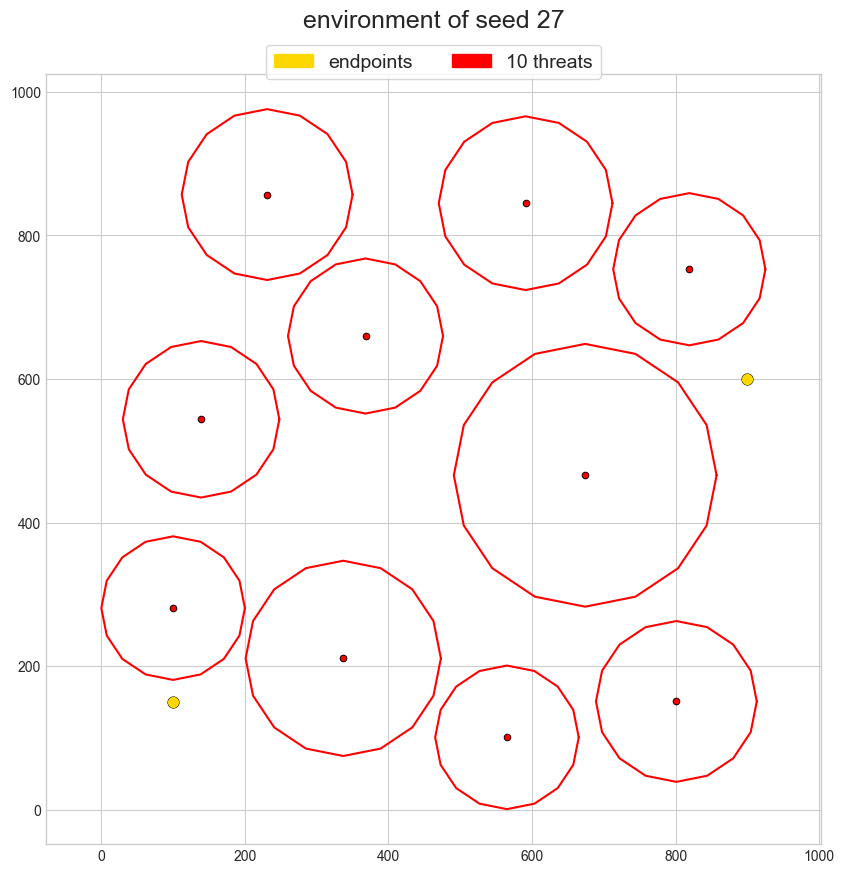

In [3]:
env = Environment(source=Point(100,150), target=Point(900,600), num_threats=10, seed_value=27)
env.plot()
plt.title(f'environment of seed {env._seed_value}', fontsize=18, y=1.05)
plt.legend(handles=[Patch(color='gold', label='endpoints'),
                    Patch(color='red', label=f'{len(env.threats)} threats')],
           fontsize=14, frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True)

plt.savefig(f'../plots/environment_of_seed_{env._seed_value}.png')
plt.show()

In [3]:
rm = VisibilityRoadmap(env)
shortest_path, shortest_length, shortest_risk, shortest_time = rm.shortest_path(weight='length')
safest_path, safest_length, safest_risk, safest_time = rm.shortest_path(weight='risk')

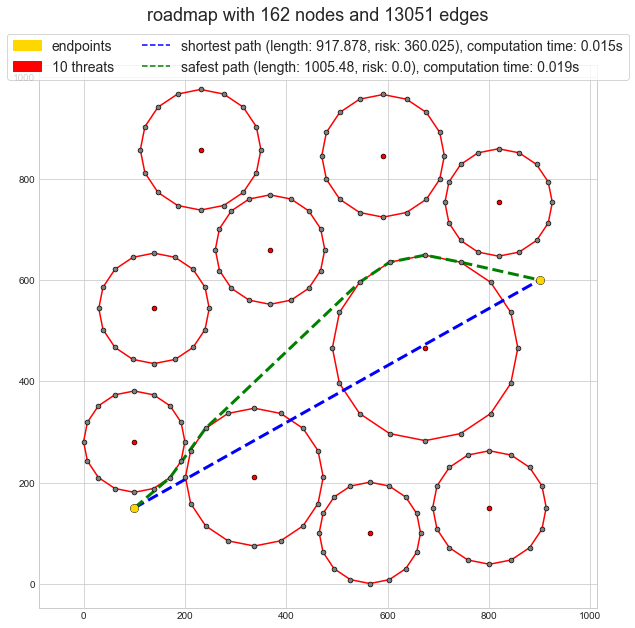

In [4]:
rm.plot(display_edges=False)
plt.plot([p[0] for p in shortest_path], [p[1] for p in shortest_path], color='blue', linestyle='dashed', linewidth=3)
plt.plot([p[0] for p in safest_path], [p[1] for p in safest_path], color='green', linestyle='dashed', linewidth=3)

plt.title(f'roadmap with {len(rm._graph.nodes)} nodes and {len(rm._graph.edges)} edges', fontsize=18, y=1.07)
plt.legend(handles=[Patch(color='gold', label='endpoints'),
                    Patch(color='red', label=f'{len(env.threats)} threats'),
                    Line2D([0], [0], color='blue', linestyle='dashed', label=f'shortest path (length: {shortest_length}, risk: {shortest_risk}), computation time: {shortest_time}s'),
                    Line2D([0], [0], color='green', linestyle='dashed', label=f'safest path (length: {safest_length}, risk: {safest_risk}), computation time: {safest_time}s')],
           fontsize=14, frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.07), ncol=2, fancybox=True)

plt.savefig('../plots/shortest_and_safest_path_examples.png')
plt.show()

In [5]:
from roadmap.prm import PRM

In [13]:
rm = PRM(env)
building_time = rm.add_samples(3000)

100%|██████████| 3000/3000 [02:43<00:00, 18.32it/s]


In [14]:
constrained_path, constrained_length, constrained_risk, constrained_time = rm.constrained_shortest_path(weight='length', constraint='risk', budget=100)

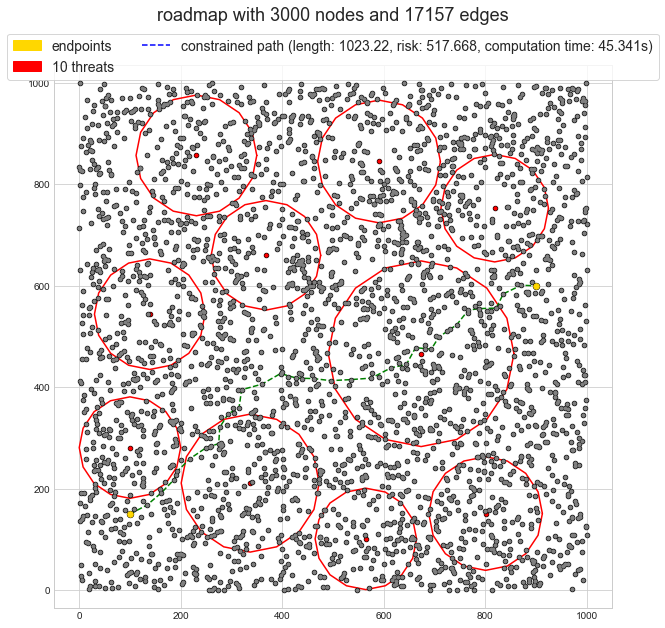

In [15]:
rm.plot(display_edges=False)
plt.plot([p[0] for p in constrained_path], [p[1] for p in constrained_path], color='green', linestyle='dashed', linewidth=3)

plt.title(f'roadmap with {len(rm._graph.nodes)} nodes and {len(rm._graph.edges)} edges', fontsize=18, y=1.07)
plt.legend(handles=[Patch(color='gold', label='endpoints'),
                    Patch(color='red', label=f'{len(env.threats)} threats'),
                    Line2D([0], [0], color='blue', linestyle='dashed', label=f'constrained path (length: {constrained_length}, risk: {constrained_risk}, computation time: {constrained_time + building_time}s)')],
           fontsize=14, frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.07), ncol=2, fancybox=True)

plt.savefig('../plots/constrained_path_examples.png')
plt.show()